In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
import itertools

In [31]:
train= pd.read_csv('train.csv')
validation= pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

In [32]:
def basic_stats(df):
    win = pd.DataFrame()
    temp = pd.DataFrame()
    stats = pd.DataFrame()
    stats['Advertiser'] = np.sort(df.advertiser.unique())
    stats['Impressions'] = df.groupby('advertiser').size().values    
    click = df.groupby('advertiser').click.value_counts() 
    stats['Clicks'] = click.iloc[click.index.get_level_values('click') == 1].values
    click_w = df.loc[( df['bidprice']>= df['payprice']) & (df['click']==1 )].groupby('advertiser')
    click2 = df.loc[( df['bidprice']>= df['payprice'])].groupby('advertiser')
    cost_click = click2.sum()[['click','payprice']]
    temp['Cost'] = (cost_click['payprice']).tolist()
    ## Cost
    stats['Cost'] = ((cost_click['payprice']/1000).round(1)).tolist()
    stats['CTR'] = (((stats.Clicks / stats.Impressions) * 100).round(3)).astype(str) + '%'
    ##eCPC
    stats['eCPC'] = ((temp.Cost / (stats.Clicks*1000 )).round(2)).astype(str)
    ##CPM
    win['Cost'] = df.groupby('advertiser').payprice.sum().values
    stats['CPM'] = (((win.Cost / stats.Impressions)).round(2)).astype(str) 
    return stats

In [37]:
# train data statistics
train_stat = basic_stats(train)

In [38]:
train_stat

,Advertiser,Impressions,Clicks,Cost,CTR,eCPC,CPM
0,1458,492353,385,33968.7,0.078%,88.23,68.99
1,2259,133673,43,12428.2,0.032%,289.03,92.97
2,2261,110122,36,9873.8,0.033%,274.27,89.66
3,2821,211366,131,18828.0,0.062%,143.73,89.08
4,2997,49829,217,3129.3,0.435%,14.42,62.8
5,3358,264956,202,22447.2,0.076%,111.12,84.72
6,3386,455041,320,34931.8,0.07%,109.16,76.77
7,3427,402806,272,30458.7,0.068%,111.98,75.62
8,3476,310835,187,23918.8,0.06%,127.91,76.95


In [39]:
val_stats = basic_stats(validation)

In [40]:
val_stats

,Advertiser,Impressions,Clicks,Cost,CTR,eCPC,CPM
0,1458,62353,49,4294.6,0.079%,87.64,68.88
1,2259,16715,2,1568.8,0.012%,784.4,93.86
2,2261,13550,3,1214.9,0.022%,404.96,89.66
3,2821,26503,23,2394.9,0.087%,104.13,90.36
4,2997,6176,26,388.8,0.421%,14.95,62.95
5,3358,32939,23,2794.0,0.07%,121.48,84.82
6,3386,56665,28,4350.8,0.049%,155.39,76.78
7,3427,50183,37,3776.7,0.074%,102.07,75.26
8,3476,38841,11,2993.8,0.028%,272.16,77.08


In [43]:
weekday_CTR =pd.DataFrame()
weekday_CTR['weekday'] = np.sort(df_train_original.weekday.unique())

click = df_train_original.groupby(['advertiser','weekday']).click.value_counts()

imp_ad1 = df_train_original.groupby('weekday').advertiser.value_counts()
imp_ad2 = df_train_original.groupby('weekday').advertiser.value_counts()

imp_ad1_cal = imp_ad1.iloc[imp_ad1.index.get_level_values('advertiser') == 1458].values 
imp_ad2_cal = imp_ad2.iloc[imp_ad2.index.get_level_values('advertiser') == 3358].values


click_ad1 = click.iloc[click.index.get_level_values('advertiser') == 1458]
click_ad2 = click.iloc[click.index.get_level_values('advertiser') == 3358]

click_ad1_cal = click_ad1.iloc[click_ad1.index.get_level_values('click') == 1].values
click_ad2_cal = click_ad2.iloc[click_ad2.index.get_level_values('click') == 1].values

weekday_CTR['CTR_1458'] = ((click_ad1_cal/ imp_ad1_cal) * 100).round(3)
weekday_CTR['CTR_3358'] = ((click_ad2_cal / imp_ad2_cal) * 100).round(3)

In [44]:
weekday_CTR

,weekday,CTR_1458,CTR_3358
0,0,0.068,0.075
1,1,0.095,0.060
2,2,0.071,0.027
3,3,0.076,0.103
4,4,0.089,0.076
5,5,0.087,0.075
6,6,0.064,0.069


In [51]:
adexchange_CTR =pd.DataFrame()
adexchange_CTR['adexchange'] = np.sort(df_train_original.adexchange.unique())

adexchange_click = df_train_original.groupby(['advertiser','adexchange']).click.value_counts()

adexchange_imp_ad1 = df_train_original.groupby('adexchange').advertiser.value_counts()
adexchange_imp_ad2 = df_train_original.groupby('adexchange').advertiser.value_counts()

adexchange_imp_ad1_cal = adexchange_imp_ad1.iloc[adexchange_imp_ad1.index.get_level_values('advertiser') == 1458].values 
adexchange_imp_ad2_cal = adexchange_imp_ad2.iloc[adexchange_imp_ad2.index.get_level_values('advertiser') == 3358].values


ad_click_ad1 = adexchange_click.iloc[adexchange_click.index.get_level_values('advertiser') == 1458]
ad_click_ad2 = adexchange_click.iloc[adexchange_click.index.get_level_values('advertiser') == 3358]

ad_click_ad1_cal = ad_click_ad1.iloc[ad_click_ad1.index.get_level_values('click') == 1].values
ad_click_ad2_cal = click_ad2.iloc[ad_click_ad2.index.get_level_values('click') == 1].values
adexchange_CTR = adexchange_CTR.drop([3,4])
adexchange_CTR['CTR_1458'] = ((ad_click_ad1_cal/ adexchange_imp_ad1_cal) * 100).round(3)
adexchange_CTR['CTR_3358'] = ((ad_click_ad1_cal / adexchange_imp_ad2_cal) * 100).round(3)

In [52]:
adexchange_CTR

,adexchange,CTR_1458,CTR_3358
0,1.0,0.081,0.100
1,2.0,0.078,0.136
2,3.0,0.076,0.290


Text(0.5, 0, 'adexchange')

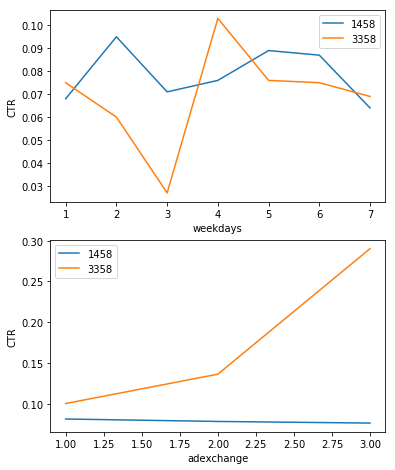

In [54]:
double_graph=plt.figure(figsize=(6,12))
graph1 = double_graph.add_subplot(3,1,1)
graph1.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_1458.values, label='1458')
graph1.plot(1 + weekday_CTR.weekday.values, weekday_CTR.CTR_3358.values, label='3358')
graph1.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')

graph2 = double_graph.add_subplot(3,1,2)
graph2.plot( adexchange_CTR.adexchange.values, adexchange_CTR.CTR_1458.values, label='1458')
graph2.plot(adexchange_CTR.adexchange.values, adexchange_CTR.CTR_3358.values, label='3358')
graph2.legend()
plt.ylabel('CTR')
plt.xlabel('adexchange')

In [64]:
price_weekday = pd.DataFrame()
price_weekday['weekday'] = np.sort(df_train_original.weekday.unique())

price_ad1 = df_train_original.loc[(df_train_original['advertiser']==1458)]['payprice'].groupby(df_train_original['weekday'])
price_ad2 = df_train_original.loc[(df_train_original['advertiser']==3358)]['payprice'].groupby(df_train_original['weekday'])

price_weekday['Price_1458'] = price_ad1.mean()
price_weekday['Price_3358'] = price_ad2.mean()

In [65]:
price_weekday

,weekday,Price_1458,Price_3358
0,0,63.319567,82.694414
1,1,74.285561,84.331138
2,2,72.310495,88.601932
3,3,69.840215,80.652537
4,4,69.194245,87.681772
5,5,67.872030,88.858917
6,6,67.099226,83.211502


In [66]:
price_hour = pd.DataFrame()
price_hour['hour'] = np.sort(df_train_original.hour.unique())

price_ad1_hour = df_train_original.loc[(df_train_original['advertiser']==1458)]['payprice'].groupby(df_train_original['hour'])
price_ad2_hour = df_train_original.loc[(df_train_original['advertiser']==3358)]['payprice'].groupby(df_train_original['hour'])

price_hour['Price_1458'] = price_ad1_hour.mean()
price_hour['Price_3358'] = price_ad2_hour.mean()
price_hour

,hour,Price_1458,Price_3358
0,0,65.606755,98.592130
1,1,62.611919,77.960868
2,2,65.546339,73.645767
3,3,72.123677,69.991822
4,4,68.306258,77.632932
5,5,72.450813,68.778918
6,6,65.982274,88.642221
7,7,69.852232,74.147975
8,8,72.146726,78.624983
9,9,68.792087,73.677632


Text(0.5, 0, 'hour')

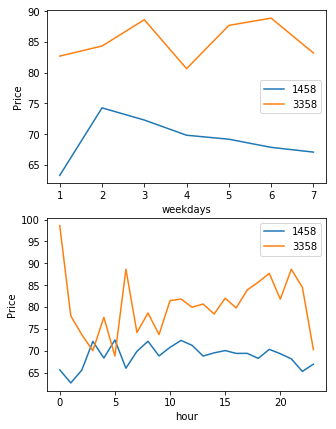

In [67]:
price_pic =plt.figure(figsize=(5,7))
graph1_price = price_pic.add_subplot(2,1,1)
graph1_price.plot(1 + price_weekday.weekday.values, price_weekday.Price_1458.values, label='1458')
graph1_price.plot(1 + price_weekday.weekday.values, price_weekday.Price_3358.values, label='3358')
graph1_price.legend()
plt.ylabel('Price')
plt.xlabel('weekdays')

graph2_price = price_pic.add_subplot(2,1,2)
graph2_price.plot( price_hour.hour.values, price_hour.Price_1458.values, label='1458')
graph2_price.plot(price_hour.hour.values, price_hour.Price_3358.values, label='3358')
graph2_price.legend()
plt.ylabel('Price')
plt.xlabel('hour')


In [70]:
CPC_w = pd.DataFrame()
CPC_w['weekday'] = np.sort(df_train_original.weekday.unique())

click = df_train_original.loc[(df_train_original['click']==1)]

click_ad1_cpc = click.loc[(df_train_original['advertiser']==1458)]
click_ad2_cpc = click.loc[(df_train_original['advertiser']==3358)]


click_ad1_cal_cpc = click_ad1_cpc['click'].groupby(df_train_original['weekday'])
click_ad2_cal_cpc = click_ad2_cpc['click'].groupby(df_train_original['weekday'])

cost_cal_ad1 = df_train_original['payprice'].groupby(df_train_original['weekday'].loc[(df_train_original['advertiser']==1458)])
cost_cal_ad2 = df_train_original['payprice'].groupby(df_train_original['weekday'].loc[(df_train_original['advertiser']==3358)])


eCPC_ad1 = (cost_cal_ad1.sum()/click_ad1_cal_cpc.sum())/1000
eCPC_ad2 = (cost_cal_ad2.sum()/click_ad2_cal_cpc.sum())/1000


CPC_w['eCPC_1458'] = eCPC_ad1
CPC_w['eCPC_3358'] = eCPC_ad2

In [71]:
CPC_w

,weekday,eCPC_1458,eCPC_3358
0,0,92.996962,110.900727
1,1,78.111857,140.848813
2,2,102.417271,333.276167
3,3,92.503365,78.506959
4,4,77.989726,115.733444
5,5,78.418468,118.441921
6,6,104.094239,119.878650


Text(0.5, 0, 'weekday')

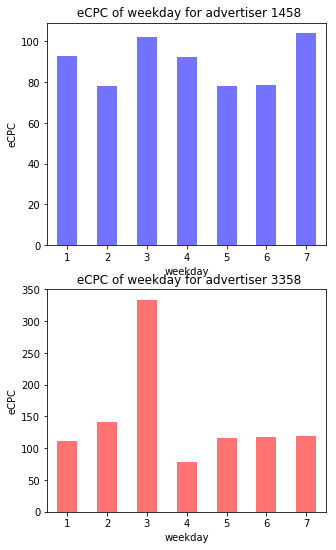

In [73]:
pic_cpc=plt.figure(figsize=(5,9))
alpha_level = 0.55

pic1_cpc = pic_cpc.add_subplot(2,1,1)

CPC_w['eCPC_1458'].plot(kind='bar', color='blue', 
                  alpha=alpha_level)
pic1_cpc.set_xticklabels(["1", "2", "3","4","5","6","7"], rotation=0)
plt.title(" eCPC of weekday for advertiser 1458")
plt.ylabel('eCPC')
plt.xlabel('weekday')


pic2_cpc = pic_cpc.add_subplot(2,1,2)

CPC_w['eCPC_3358'].plot(kind='bar', color='red', 
                  alpha=alpha_level)
pic2_cpc.set_xticklabels(["1", "2", "3","4","5","6","7"], rotation=0)
plt.title(" eCPC of weekday for advertiser 3358")
plt.ylabel('eCPC')
plt.xlabel('weekday')